# Árvores de Decisão

Como visto em aula, algoritmos de Árvore de Decisão são comumentes utilizados para tarefas de classificação e regressão. O objetivo é criar um modelo capaz de predizer o atributo alvo a partir dos atributos preditivos usando regras simples encontradas nos dados.

#### Algumas vantagens:

- Simples de entender e interpretar. É possível visualizar as árvores geradas como muita facilidade.
- Necessita de pouca preparação dos dados. Não tem necessidade de normalização dos dados, por exemplo.
- A implementação do scikit-learn não aceita valores ausentes.
- Consegue utilizar dados numéricos e categóricos.

#### Algumas desvantagens:

- Pode apresentar variância alta. Os modelos podem apresentar com frequência sobreajuste (overfitting) aos dados. Poda e ajuste dos hiperparâmetros são soluções para evitar este comportamento.
- O viés das árvores de decisão não as permite representar de maneira adequada tarefas como XOR e multiplexador.
- Árvores de decisão podem ser tendenciosas às classes majoritárias quando as classes estão desbalanceadas.

## No scikit-learn

[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) é uma classe do módulo [tree](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree) do pacote [scikit-learn](https://scikit-learn.org/stable/).

Como outros classificadores no pacote, [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) usa como entrada dois _arrays_ : um _array_ X, de tamanho `[número_de_instâncias, número_de_atributos]`, que contém os atributos preditivos do conjunto de dados; e um _array_ Y, de tamanho `[número_de_instâncias]`, que contém o atributo alvo do conjunto de dados.

Para gerar um modelo do conjunto de dados representado por X e Y, basta usar o método [fit](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) da classe [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Depois de gerado, o modelo pode ser usado para predizer a classe de instâncias

In [2]:
clf.predict([[2., 2.]])

array([1])

Alternativamente, a probabilidade de cada classe pode ser predita, sendo ela a fração de exemplos de treinamento da mesma classe naquele nó-folha.

In [3]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) consegue lidar com tarfeas de classificação binárias e multi-classe.

Usando a base multi-classe iris, por exemplo, é possível gerar uma árvore.

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf = clf.fit(X, y)

Como dito anteriormente, as árvores de decisão podem ser facilmente interpretadas e o [scikit-learn](https://scikit-learn.org/stable/) oferece um método de visualização de árvores no módulo [tree](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree), chamado de [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree).

[Text(133.92000000000002, 181.2, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

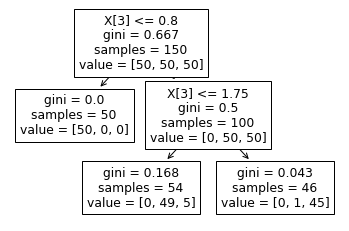

In [5]:
tree.plot_tree(clf) 

Você também pode visualizar a árvore em formato de texto.

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



## Para praticar

Para praticar os conhecimentos de hoje e de aulas anteriores, você utilizará o conjunto de dados Titanic que se encontra junto aos outros materiais. Este conjunto de dados possui informações sobre passageiros à bordo do Titanic durante o famoso acidente e o atributo alvo é se o passageiro sobreviveu ou não ao acidente.

### O que esperamos que consiga fazer:

- Ler o arquivo CSV
- Olhar os valores presentes no conjunto de dados
- Separar o conjunto em atributos preditivos e atributo alvo, no qual _survived_ é o atributo alvo
- Lidar com valores ausentes. Lembre-se: a árvore não aceitará valores ausentes! Você terá que lidar com este problema
- Gerar uma árvore utilizando os valores padrão do scikit-learn
- Visualizar a árvore gerada
- Fazer uma validação cruzada com 10 _folds_ para avaliar o desempenho preditivo do algoritmo de árvore de decisão

### O que pode ser mais difícil de fazer:

- Variar os hiperparâmetros da árvore e verificar como os modelos são diferentes. Para detalhes sobre os hiperparâmetros implementados no scikit-learn, acesse o link [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- Comparar o desemepenho preditivo usando diferentes valores de hiperparâmetros

Parte deste material é um resumo em português da documentação do scikit-learn. Para acessar o texto original acesse o link [tree](https://scikit-learn.org/stable/modules/tree.html)